# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_results = pd.merge(study_results, mouse_metadata, on=['Mouse ID'])

# Display the data table for preview
complete_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [20]:
complete_results['Mouse ID'].nunique()


249

In [21]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ID = complete_results[complete_results.duplicated()]
duplicate_ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.0,0,Propriva,Female,21,26


In [22]:
# Optional: Get all the data for the duplicate mouse ID. ** Only shows the duplicate timepoint rows **
duplicate_rows = complete_results[complete_results.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_rows.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dropped_mouse = 'g989'
complete_no_dup = complete_results[complete_results['Mouse ID'] != dropped_mouse]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [24]:
# Check the number of mice in the clean DataFrame.
complete_no_dup['Mouse ID'].nunique()

248

## Summary Statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_tumor_vol = pd.pivot_table(complete_no_dup, values='Tumor Volume (mm3)', index='Drug Regimen', aggfunc='mean')
median_tumor_vol = pd.pivot_table(complete_no_dup, values='Tumor Volume (mm3)', index='Drug Regimen', aggfunc='median')
var_tumor_vol = pd.pivot_table(complete_no_dup, values='Tumor Volume (mm3)', index='Drug Regimen', aggfunc='var')
stdev_tumor_vol = pd.pivot_table(complete_no_dup, values='Tumor Volume (mm3)', index='Drug Regimen', aggfunc='std')

std_err = complete_no_dup.groupby('Drug Regimen')
std_err[['Tumor Volume (mm3)']].sem()

# Summary stats
summary_stats = pd.merge(mean_tumor_vol, median_tumor_vol, on='Drug Regimen', suffixes=('_i', '_j'))
summary_stats = pd.merge(summary_stats, var_tumor_vol, on='Drug Regimen', suffixes=('_a', '_b'))
summary_stats = pd.merge(summary_stats, stdev_tumor_vol, on='Drug Regimen', suffixes=('_x', '_y'))
summary_stats = pd.merge(summary_stats, std_err[['Tumor Volume (mm3)']].sem(), on='Drug Regimen')
summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err']
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [26]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_2 = complete_no_dup.groupby('Drug Regimen')
summary_stats_2 = summary_stats_2.agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']
summary_stats_2

/var/folders/5r/qv0zmnq95tb4t8f_16fhk2m80000gp/T/ipykernel_24673/2319124684.py:6: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summary_stats_2 = summary_stats_2.agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

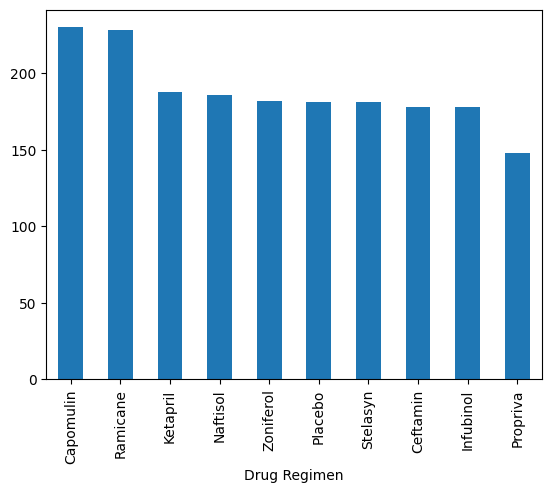

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
observed_timepoints = complete_no_dup.groupby('Drug Regimen')
observed_timepoints = observed_timepoints['Drug Regimen']
observed_timepoints_df = pd.DataFrame(observed_timepoints.count())
observed_timepoints_df.columns = ['Timepoints']
observed_timepoints_df = observed_timepoints_df.sort_values(by='Timepoints', ascending=False)
observed_timepoints_df.plot.bar(legend=False)
# observed_timepoints_df.plot.bar(x='Drug Regimen', y='Timepoints', legend=False)

Text(0, 0.5, '# of Observed Mouse Timpepoints')

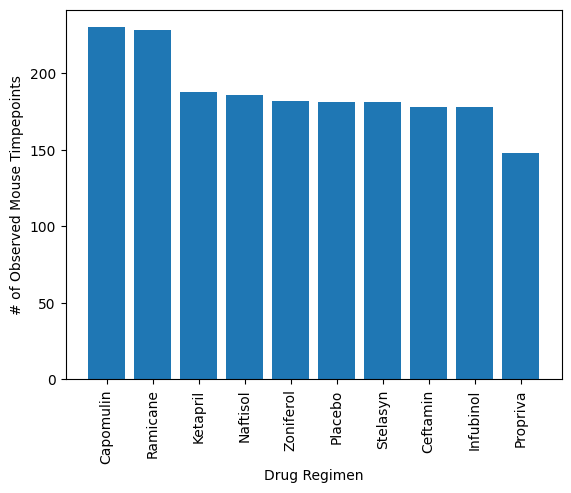

In [28]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.bar(observed_timepoints_df.index, observed_timepoints_df['Timepoints'])
plt.xticks(observed_timepoints_df.index, rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timpepoints')

<Axes: ylabel='Sex'>

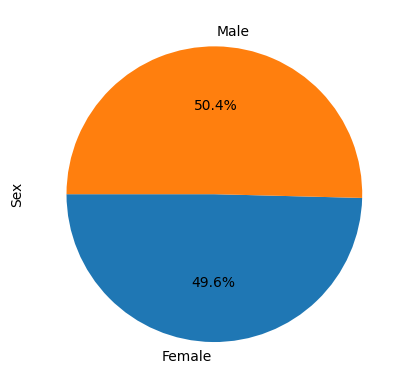

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = complete_no_dup.drop_duplicates('Mouse ID')
sex = sex.groupby('Sex')['Sex'].count()
sex
sex.plot.pie(autopct='%1.1f%%', startangle=180)

Text(0, 0.5, 'Sex')

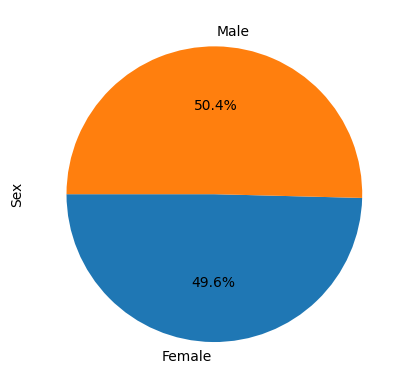

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex, labels=['Female', 'Male'], autopct="%1.1f%%", startangle=180)
plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = complete_no_dup.groupby(['Drug Regimen', 'Mouse ID'])['Timepoint'].max()
max_timepoint = pd.DataFrame(max_timepoint)
max_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
complete_max_timepoint = pd.merge(complete_no_dup, max_timepoint, on='Mouse ID', how='left')
complete_max_timepoint = complete_max_timepoint.rename(columns={'Timepoint_y': 'Max Timepoint', 'Timepoint_x': 'Timepoint'})
complete_max_timepoint.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Max Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45


In [32]:
# Find the tumor volume at the end timepoint for each mouse for Capomulin, Ramicane, Infubinol and Ceftamin

end_tumor_vol = complete_max_timepoint[complete_max_timepoint['Timepoint'] == complete_max_timepoint['Max Timepoint']]
end_vol_capomulin = (complete_max_timepoint['Drug Regimen'] == 'Capomulin')
end_vol_ramicane = (complete_max_timepoint['Drug Regimen'] == 'Ramicane')
end_vol_infubinol = (complete_max_timepoint['Drug Regimen'] == 'Infubinol')
end_vol_ceftamin = (complete_max_timepoint['Drug Regimen'] == 'Ceftamin')
end_vol_cric = complete_max_timepoint[end_vol_capomulin | end_vol_ramicane | end_vol_infubinol | end_vol_ceftamin]
end_vol_cric = end_vol_cric[end_vol_cric['Timepoint'] == end_vol_cric['Max Timepoint']]
end_vol_cric

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Max Timepoint
9,b128,45,38.982878,2,Capomulin,Female,9,22,45
214,c326,5,36.321346,0,Infubinol,Female,18,25,5
224,c139,45,72.226731,2,Infubinol,Male,11,28,45
226,v339,5,46.250112,0,Infubinol,Male,20,26,5
233,a577,30,57.031862,2,Infubinol,Female,6,25,30
...,...,...,...,...,...,...,...,...,...
1844,t565,45,34.455298,0,Capomulin,Female,20,17,45
1854,i557,45,47.685963,1,Capomulin,Female,1,24,45
1864,m957,45,33.329098,1,Capomulin,Female,3,19,45
1869,f966,20,30.485985,0,Capomulin,Male,16,17,20


In [33]:
# Group the data by the drug regimen
pivot = pd.pivot_table(end_vol_cric, index=['Drug Regimen', 'Mouse ID'], values='Tumor Volume (mm3)')
pivot

Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               38.982878
             b742               38.939633
             f966               30.485985
             g288               37.074024
             g316               40.159220
...                                   ...
Ramicane     s508               30.276232
             u196               40.667713
             w678               43.166373
             y449               44.183451
             z578               30.638696

[100 rows x 1 columns]

In [34]:
# reset the index
pivot = pivot.stack(level=0).unstack(level=0)
pivot

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,Tumor Volume (mm3),NaN,NaN,67.973419,NaN
a251,Tumor Volume (mm3),NaN,NaN,65.525743,NaN
a275,Tumor Volume (mm3),NaN,62.999356,NaN,NaN
a411,Tumor Volume (mm3),NaN,NaN,NaN,38.407618
a444,Tumor Volume (mm3),NaN,NaN,NaN,43.047543
...,...,...,...,...,...
y769,Tumor Volume (mm3),NaN,68.594745,NaN,NaN
y793,Tumor Volume (mm3),31.896238,NaN,NaN,NaN
y865,Tumor Volume (mm3),NaN,64.729837,NaN,NaN


In [35]:
# set the list of treatments
treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
counter = 0

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in treatment:
    quartiles = pivot[x].quantile([.25, .5, .75]).round(2)
    lowerq = quartiles[.25].round(2)
    upperq = quartiles[.75].round(2)
    iqr = round((upperq-lowerq),2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    # print data for each loop
    if counter == 0:
        print("")
    print(f"{x}:")
    print(f"Lower quartile: {lowerq}")
    print(f"Upper quartile: {upperq}")
    print(f"Interquartile range: {iqr}")
    print(f"Median: {quartiles[0.5]}")
    print(f"Values less than {lower_bound} are outliers")
    print(f"Values greater than {upper_bound} are outliers")
    print(f"")
    counter += 1


Capomulin:
Lower quartile: 32.38
Upper quartile: 40.16
Interquartile range: 7.78
Median: 38.13
Values less than 20.71 are outliers
Values greater than 51.83 are outliers

Ramicane:
Lower quartile: 31.56
Upper quartile: 40.66
Interquartile range: 9.1
Median: 36.56
Values less than 17.91 are outliers
Values greater than 54.31 are outliers

Infubinol:
Lower quartile: 54.05
Upper quartile: 65.53
Interquartile range: 11.48
Median: 60.17
Values less than 36.83 are outliers
Values greater than 82.75 are outliers

Ceftamin:
Lower quartile: 48.72
Upper quartile: 64.3
Interquartile range: 15.58
Median: 59.85
Values less than 25.35 are outliers
Values greater than 87.67 are outliers



([<matplotlib.axis.XTick at 0x17a71d9d0>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')])

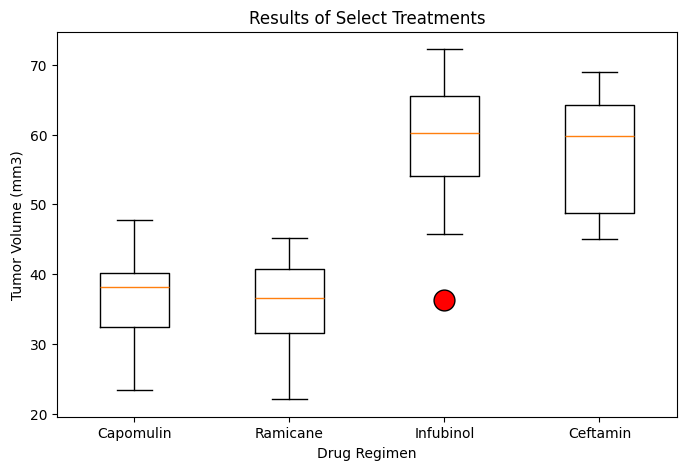

In [55]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

box_list = []

# Create a new for loop and append the box plot list with the tumor vols for each drug, drop the NaN values. 

for x in treatment:
    box_list.append(list(pivot[x].dropna()))

# Create the box plot
flierprops = dict(marker='o', markerfacecolor='r', markersize=15, markeredgecolor='black')

fig, ax1 = plt.subplots(figsize=(8,5))
ax1.set_title("Results of Select Treatments")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(box_list, notch=False, flierprops=flierprops)
plt.xticks([1,2,3,4], treatment)



## Line and Scatter Plots

<Axes: title={'center': 'Capomulin Treatment for Mouse s185'}, xlabel='Timepoint (days)', ylabel='Tumor Volume (mm3)'>

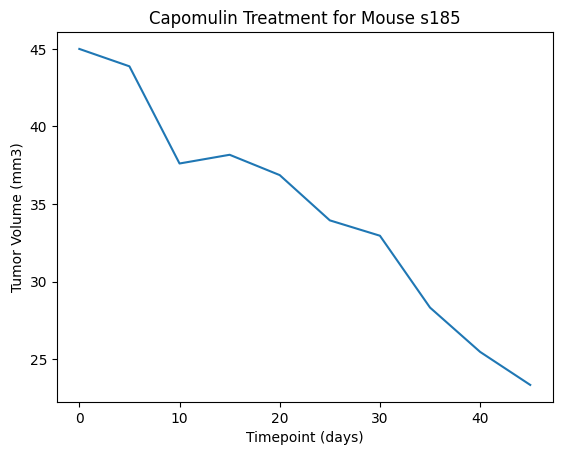

In [56]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Generate a dataframe of mice treated with Capomulin. Manually select a mouse that has timepoints from 5-45
capomulin_mice = complete_no_dup[complete_no_dup['Drug Regimen'] == 'Capomulin']

# User selected mouse 's185'
mouse_s185 = capomulin_mice[capomulin_mice['Mouse ID'] == 's185']

# Define the axis - unneccessary step but was nice to check :) 
mouse_s185_lineplot = mouse_s185[['Timepoint', 'Tumor Volume (mm3)']]

# Generate a line plot of tumor volume vs. timepoint for mouse s185
mouse_s185_lineplot.plot.line(x='Timepoint', y='Tumor Volume (mm3)', title='Capomulin Treatment for Mouse s185', legend=False, xlabel= 'Timepoint (days)', ylabel='Tumor Volume (mm3)')



<Axes: xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

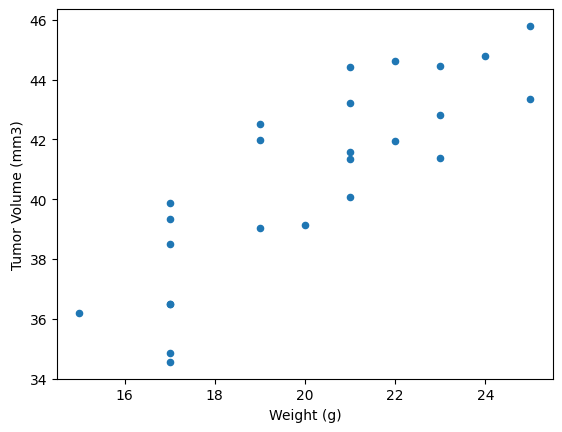

In [71]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Calculate the average tumor volume and weight of each mouse using a pd pivot table
capomulin_mice_avg_tumor_vol_pvt = pd.pivot_table(capomulin_mice, values=['Tumor Volume (mm3)', 'Weight (g)'], index='Mouse ID', aggfunc='mean')

# Plot the data using a scatter plot
capomulin_mice_avg_tumor_vol_pvt.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')

## Correlation and Regression

0.84


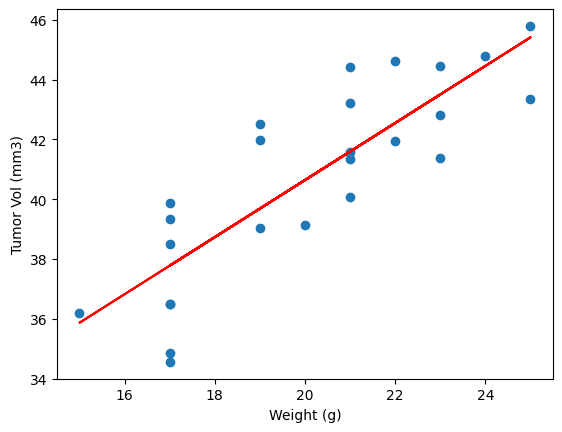

In [76]:
# Calculate the correlation coefficient and a linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Import scipy.stats
from scipy.stats import linregress

# Calculate the correlation coefficient
correlation_capomulin = capomulin_mice_avg_tumor_vol_pvt['Weight (g)'].corr(capomulin_mice_avg_tumor_vol_pvt['Tumor Volume (mm3)'])
print(round(correlation_capomulin, 2))

# Add the linear regression equation and line to the plot
(slope,intercept, rvalue, pvalue, stderr) = linregress(capomulin_mice_avg_tumor_vol_pvt['Weight (g)'], capomulin_mice_avg_tumor_vol_pvt['Tumor Volume (mm3)'])
regress_values = capomulin_mice_avg_tumor_vol_pvt['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(capomulin_mice_avg_tumor_vol_pvt['Weight (g)'],capomulin_mice_avg_tumor_vol_pvt['Tumor Volume (mm3)'])
plt.plot(capomulin_mice_avg_tumor_vol_pvt['Weight (g)'],regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Vol (mm3)')
plt.show()